# Implementation 3 - Simple linear regression

Here are some examples of code implementation for data preprocessing.<br>
Objectives: train a simple linear regression, make some predictions, evaluate the model.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn 

## Importing the data set

This data set is composed of records of money (in k€) invested in TV, radio and newspaper ads for specific products and the corresponding sales (in m$).

In [4]:
data = pd.read_csv("Advertising.csv")

In [5]:
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [6]:
data = data.drop(['Unnamed: 0'], axis=1)
data.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


## Data inspection

In [7]:
correlation = data.corr()
correlation

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


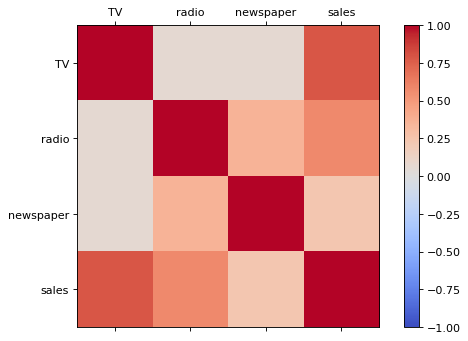

In [8]:
fig = plt.figure(figsize=(8,5), dpi= 80)
ax = fig.add_subplot(1,1,1)
cax = ax.matshow(correlation, cmap = plt.cm.coolwarm, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(correlation))
ax.set_xticks(ticks)
ax.set_yticks(ticks)
names = data.columns
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

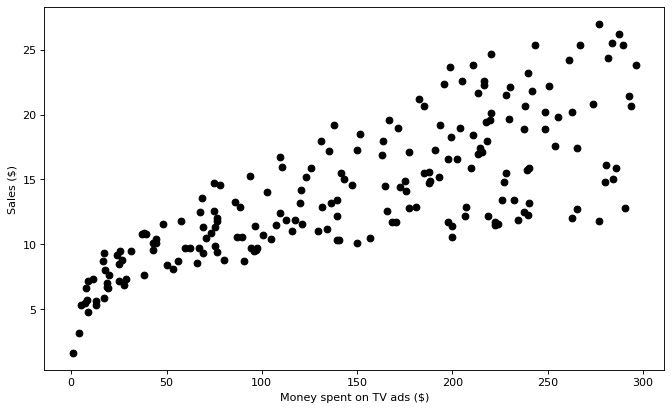

In [9]:
plt.figure(figsize=(10,6), dpi= 80)
plt.scatter(data['TV'], data['sales'], c='black')
plt.xlabel("Money spent on TV ads ($)")
plt.ylabel("Sales ($)")
plt.show()

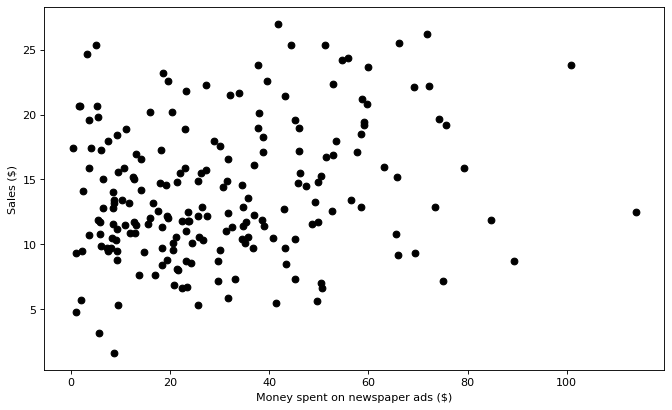

In [10]:
plt.figure(figsize=(10,6), dpi= 80)
plt.scatter(data['newspaper'], data['sales'], c='black')
plt.xlabel("Money spent on newspaper ads ($)")
plt.ylabel("Sales ($)")
plt.show()

## Simple linear regression

We notice from data inspection that 'sales' is especially correlated with 'TV'.<br>
In this section, we will consider the TV expenditures as the unique feature and the sales as the response.

### Data preparation

In [11]:
X = data['TV'].values.reshape(-1,1)
y = data['sales'].values.reshape(-1,1)

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

### Linear regression fitting

Note that we do not scale the data set here (it is not necessary for a linear regression).

In [13]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

We can check the parameters of the model (estimations of beta_0 and beta_1):

In [14]:
print(regressor.intercept_)

[7.21721612]


In [15]:
print(regressor.coef_)

[[0.04689391]]


### Making predictions

Now we can make predictions. Example: prediction of Sales for 100 $ spent on TV ads.

In [16]:
print(regressor.intercept_[0] + regressor.coef_[0][0] * 100)

11.90660665173947


In [17]:
print(regressor.predict([[100]]))

[[11.90660665]]


We can also plot the prediction line.

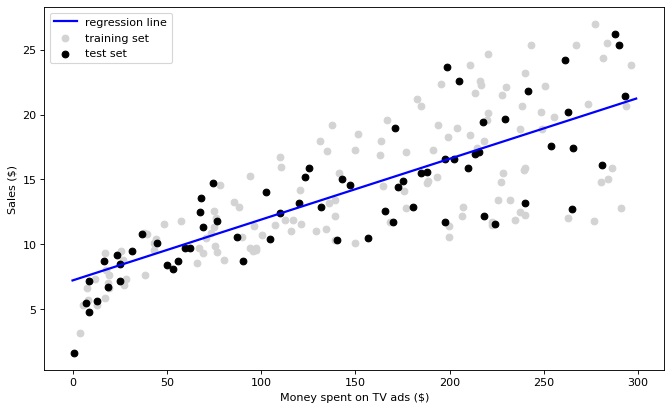

In [18]:
X_plot = np.arange(0,300,1).reshape(-1, 1)
y_plot = regressor.predict(X_plot)

plt.figure(figsize=(10,6), dpi= 80)
plt.scatter(X_train, y_train, c='lightgray', label='training set')
plt.scatter(X_test, y_test, c='black', label='test set')
plt.plot(X_plot, y_plot, c='blue', label='regression line', linewidth=2)
plt.xlabel("Money spent on TV ads ($)")
plt.ylabel("Sales ($)")
plt.legend()
plt.show()

### Model performance assessment

#### Accuracy of the regression

In [19]:
y_pred = regressor.predict(X_test)
print("Residual sum of squares (RSS): %.2f" % sum((y_pred - y_test) ** 2))
print("Mean absolute error (MAE): %.2f" % np.mean(abs(y_pred - y_test)))
print("Mean square error (MSE): %.2f" % np.mean((y_pred - y_test) ** 2))
print("Root mean square error (RMSE): %.2f" % np.sqrt(np.mean((y_pred - y_test) ** 2)))

Residual sum of squares (RSS): 563.28
Mean absolute error (MAE): 2.20
Mean square error (MSE): 8.41
Root mean square error (RMSE): 2.90
